# Importing Libraries

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

# Downloading model

In [2]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights = 'imagenet',
    input_shape = (96, 96, 3)
)

model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

# Function to get sub model

In [3]:
def submodel(layer_name):
    return tf.keras.models.Model(
        model.input,
        model.get_layer(layer_name).output
    )

submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Image Visualization

In [4]:
def create_img():
    return tf.random.uniform((96,96,3), minval = -.5, maxval = .5)

def plot_img(image, title = 'random'):
    image = image - tf.math.reduce_min(image)
    image = image/tf.math.reduce_max(image)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.show()

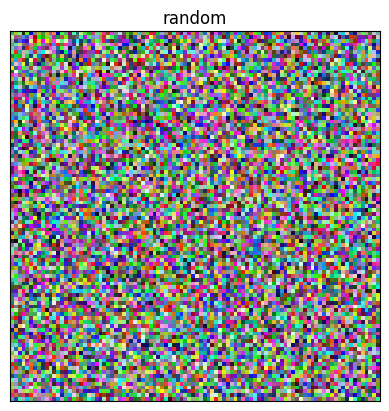

In [5]:
image = create_img()
plot_img(image)

# Training Loop

In [6]:
def visualize_filter(layer_name, f_index = None, iters = 50):
    sub = submodel(layer_name)
    num_filters = sub.output.shape[-1]

    if f_index is None:
        f_index = random.randint(0, num_filters - 1)

    assert num_filters > f_index, 'f_index is out'

    image = create_img()
    verbose_step = iters//10

    for i in range(0, iters):
        with tf.GradientTape() as tape:
            tape.watch(image)
            out = sub(tf.expand_dims(image, axis = 0))[:,:,:,f_index]

            loss = tf.math.reduce_mean(out)
        grads = tape.gradient(loss, image)
        grads = tf.math.l2_normalize(grads)
        image += grads * 10

        if (i + 1) % verbose_step == 0:
            print(f'Iteration : {i + 1}, Loss : {loss.numpy() : .4f}')


    plot_img(image, f'{layer_name}, {f_index}')

# Final Results

In [7]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration : 10, Loss :  38.0300
Iteration : 20, Loss :  74.2840
Iteration : 30, Loss :  111.0196
Iteration : 40, Loss :  148.4417
Iteration : 50, Loss :  186.2494
Iteration : 60, Loss :  224.2091
Iteration : 70, Loss :  262.4284
Iteration : 80, Loss :  300.9174
Iteration : 90, Loss :  339.5909
Iteration : 100, Loss :  378.3673


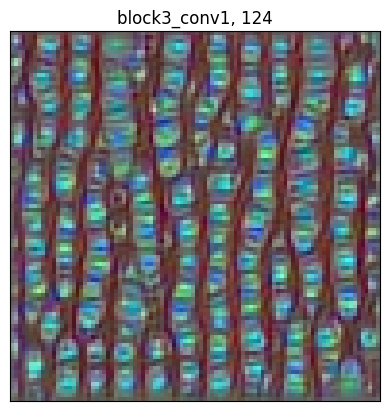

In [20]:
layer_name = 'block3_conv1' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name, iters = 100)

This is how cnn tries to learn patterns <br>
try changing layers and running u will get different results <br>
This gives very good understanding of how cnn's work